In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
file_path = '/Users/thomasguerin/Desktop/SML ASSESSMENT 11:03/vertebral_column_data.txt'
column_names = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'grade_of_spondylolisthesis', 'class']
data = pd.read_csv(file_path, sep=" ", header=None, names=column_names)

In [35]:
# convertion of the class column to numerical values
DF1 = data.copy()
DF1['class'] = DF1['class'].map({'NO': 0, 'AB': 1})

In [36]:
DF1.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


# <center> **Processing Outliers** <center>

In [37]:
# count negative values in the grade_of_spondylolisthesis column 
DF1['grade_of_spondylolisthesis'][DF1['grade_of_spondylolisthesis'] < 0].count()

58

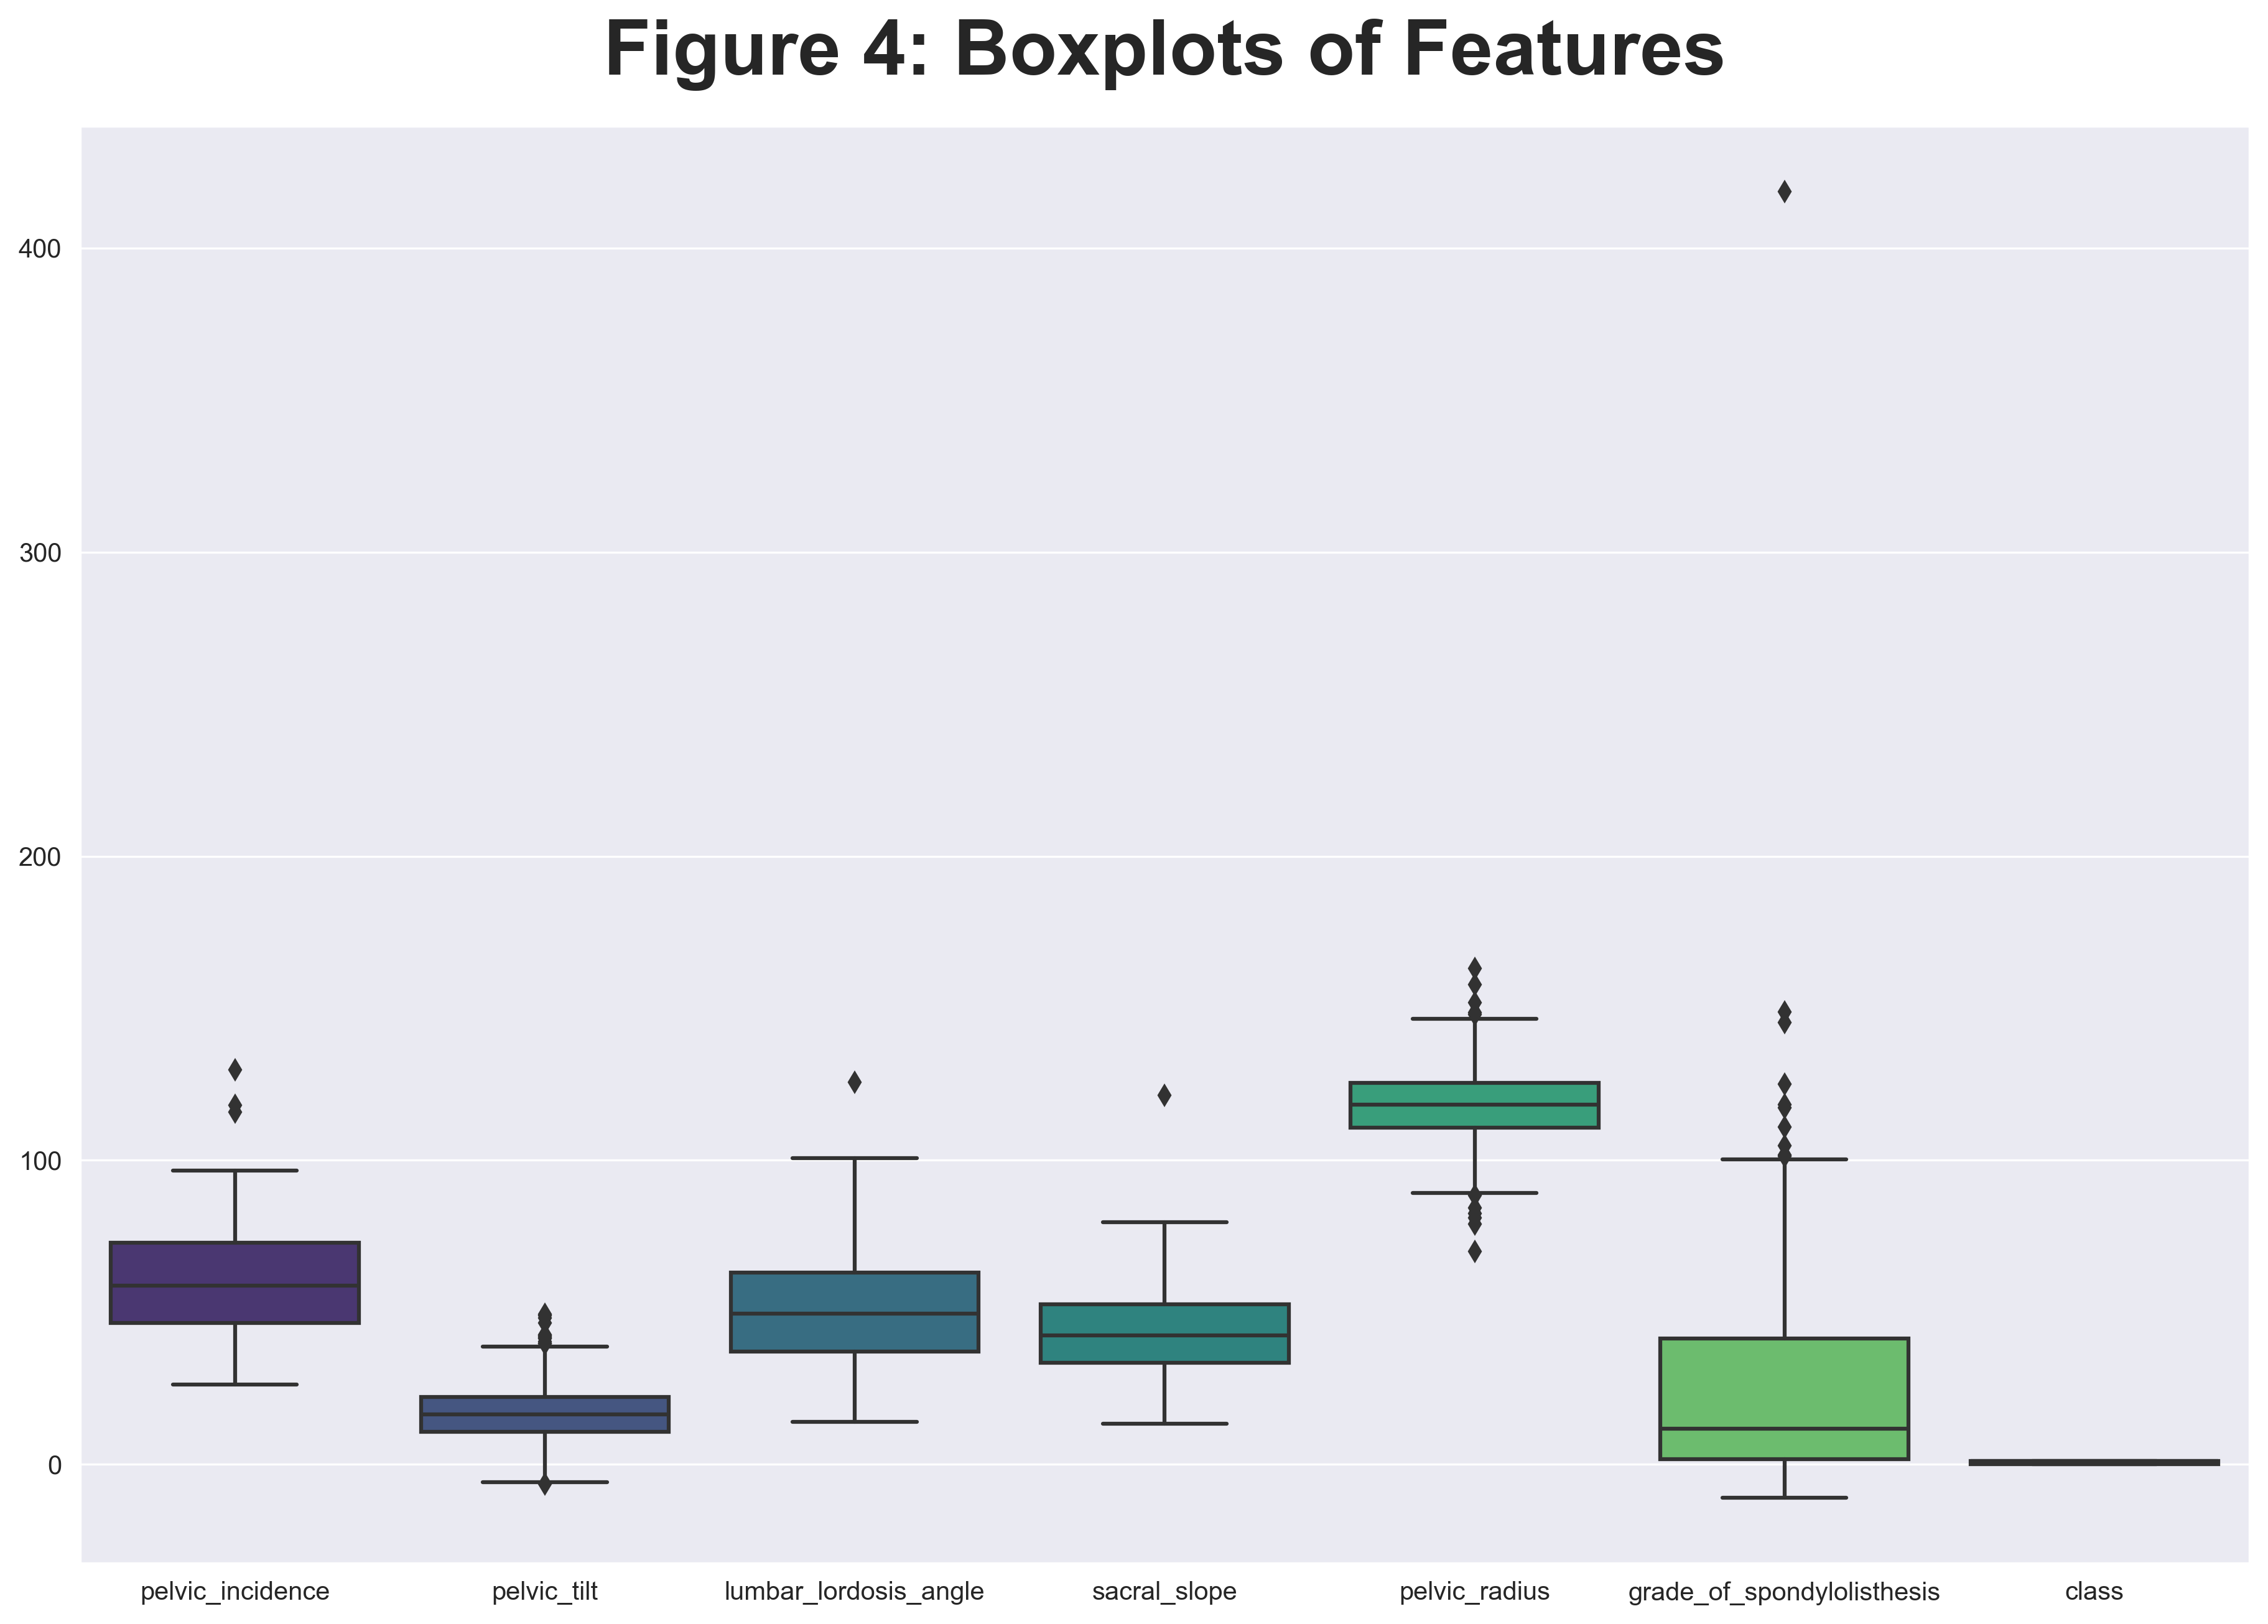

In [77]:
plt.figure(figsize=(15, 10), dpi=300)
sns.boxplot(data=DF1, palette='viridis')
plt.title('Figure 4: Boxplots of Features', fontsize=30, fontweight='bold',pad=20)
plt.x_label = 'Features'
plt.y_label = 'Values'
plt.show()

# <center> **Handling Skewed Distributions** <center>

In [83]:

# visualizing distributions of features
plt.figure(figsize=(20, 15), dpi=500, facecolor='w', edgecolor='k')
plt.title('Figure 2: Distributions of Features', fontsize=40, fontweight='bold', pad=50)
for i, column in enumerate(DF1.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column, fontsize=20, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()

/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

In [59]:
def get_outliers(df):
  outliers = []
  for index, row in df.iterrows():
    is_outlier = False
    for col in df.columns[:-1]:  # iterate through all columns except for the class label
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      if row[col] < Q1 - 1.5 * IQR or row[col] > Q3 + 1.5 * IQR:
        is_outlier = True
        break  # break if outlier is found in this column

    if is_outlier:
      outliers.append(row.to_dict())  # add the created outlier row to the outliers list

  return pd.DataFrame(outliers)

outliers_df = get_outliers(DF1.copy())  # copying dataframe to not mess up the original one
print(outliers_df.shape) 


(31, 7)


In [60]:
print(outliers_df.head(), DF1.head())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             36.69         5.01                  41.95         31.68   
1             74.43        41.56                  27.70         32.88   
2             83.93        41.29                  62.00         42.65   
3             86.90        32.93                  47.79         53.97   
4             70.22        39.82                  68.12         30.40   

   pelvic_radius  grade_of_spondylolisthesis  class  
0          84.24                        0.66    1.0  
1         107.95                        5.00    1.0  
2         115.01                       26.59    1.0  
3         135.08                      101.72    1.0  
4         148.53                      145.38    1.0      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.8

In [61]:
outliers_df.head(50)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,36.69,5.01,41.95,31.68,84.24,0.66,1.0
1,74.43,41.56,27.70,32.88,107.95,5.00,1.0
2,83.93,41.29,62.00,42.65,115.01,26.59,1.0
3,86.90,32.93,47.79,53.97,135.08,101.72,1.0
4,70.22,39.82,68.12,30.40,148.53,145.38,1.0
5,86.75,36.04,69.22,50.71,139.41,110.86,1.0
6,81.10,24.79,77.89,56.31,151.84,65.21,1.0
7,76.33,42.40,57.20,33.93,124.27,50.13,1.0
8,45.44,9.91,45.00,35.54,163.07,20.32,1.0
9,57.52,33.65,50.91,23.88,140.98,148.75,1.0


/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

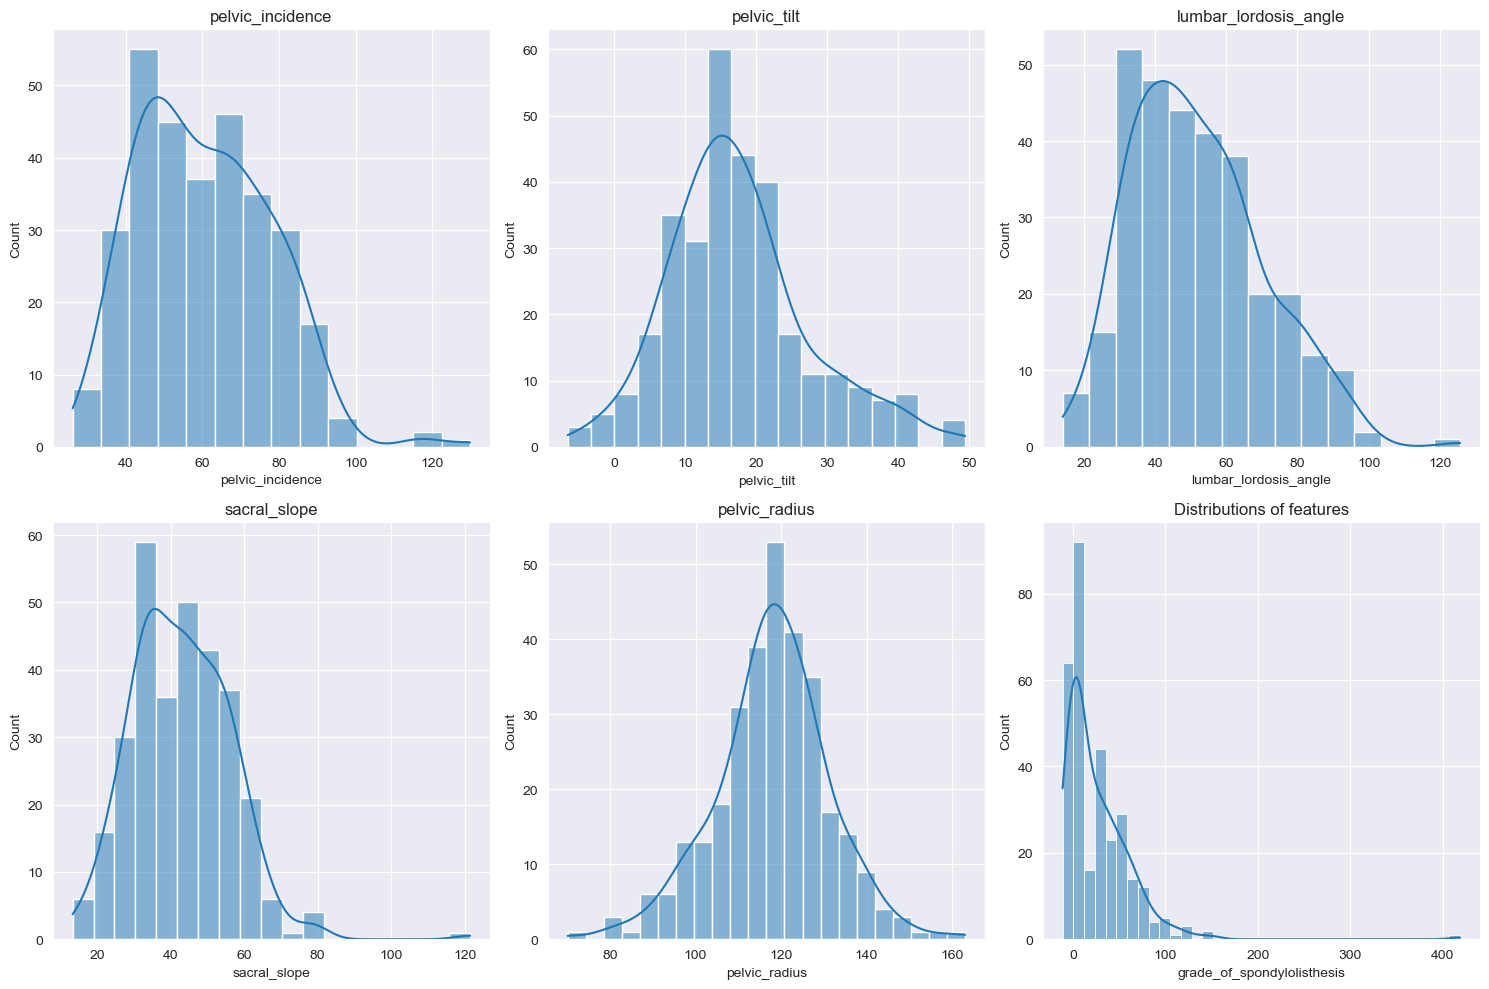

In [62]:
# visualising distributions of features for outliers-df
plt.figure(figsize=(15, 10))
for i, column in enumerate(outliers_df.columns[:-1], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.title('Distributions of features')
plt.tight_layout()
plt.show()

In [63]:
DF2 = DF1.copy()

In [64]:
# finding negative values in grade of spondylolisthesis
DF2['grade_of_spondylolisthesis'][DF2['grade_of_spondylolisthesis'] < 0].count()

58

/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/thomasguerin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


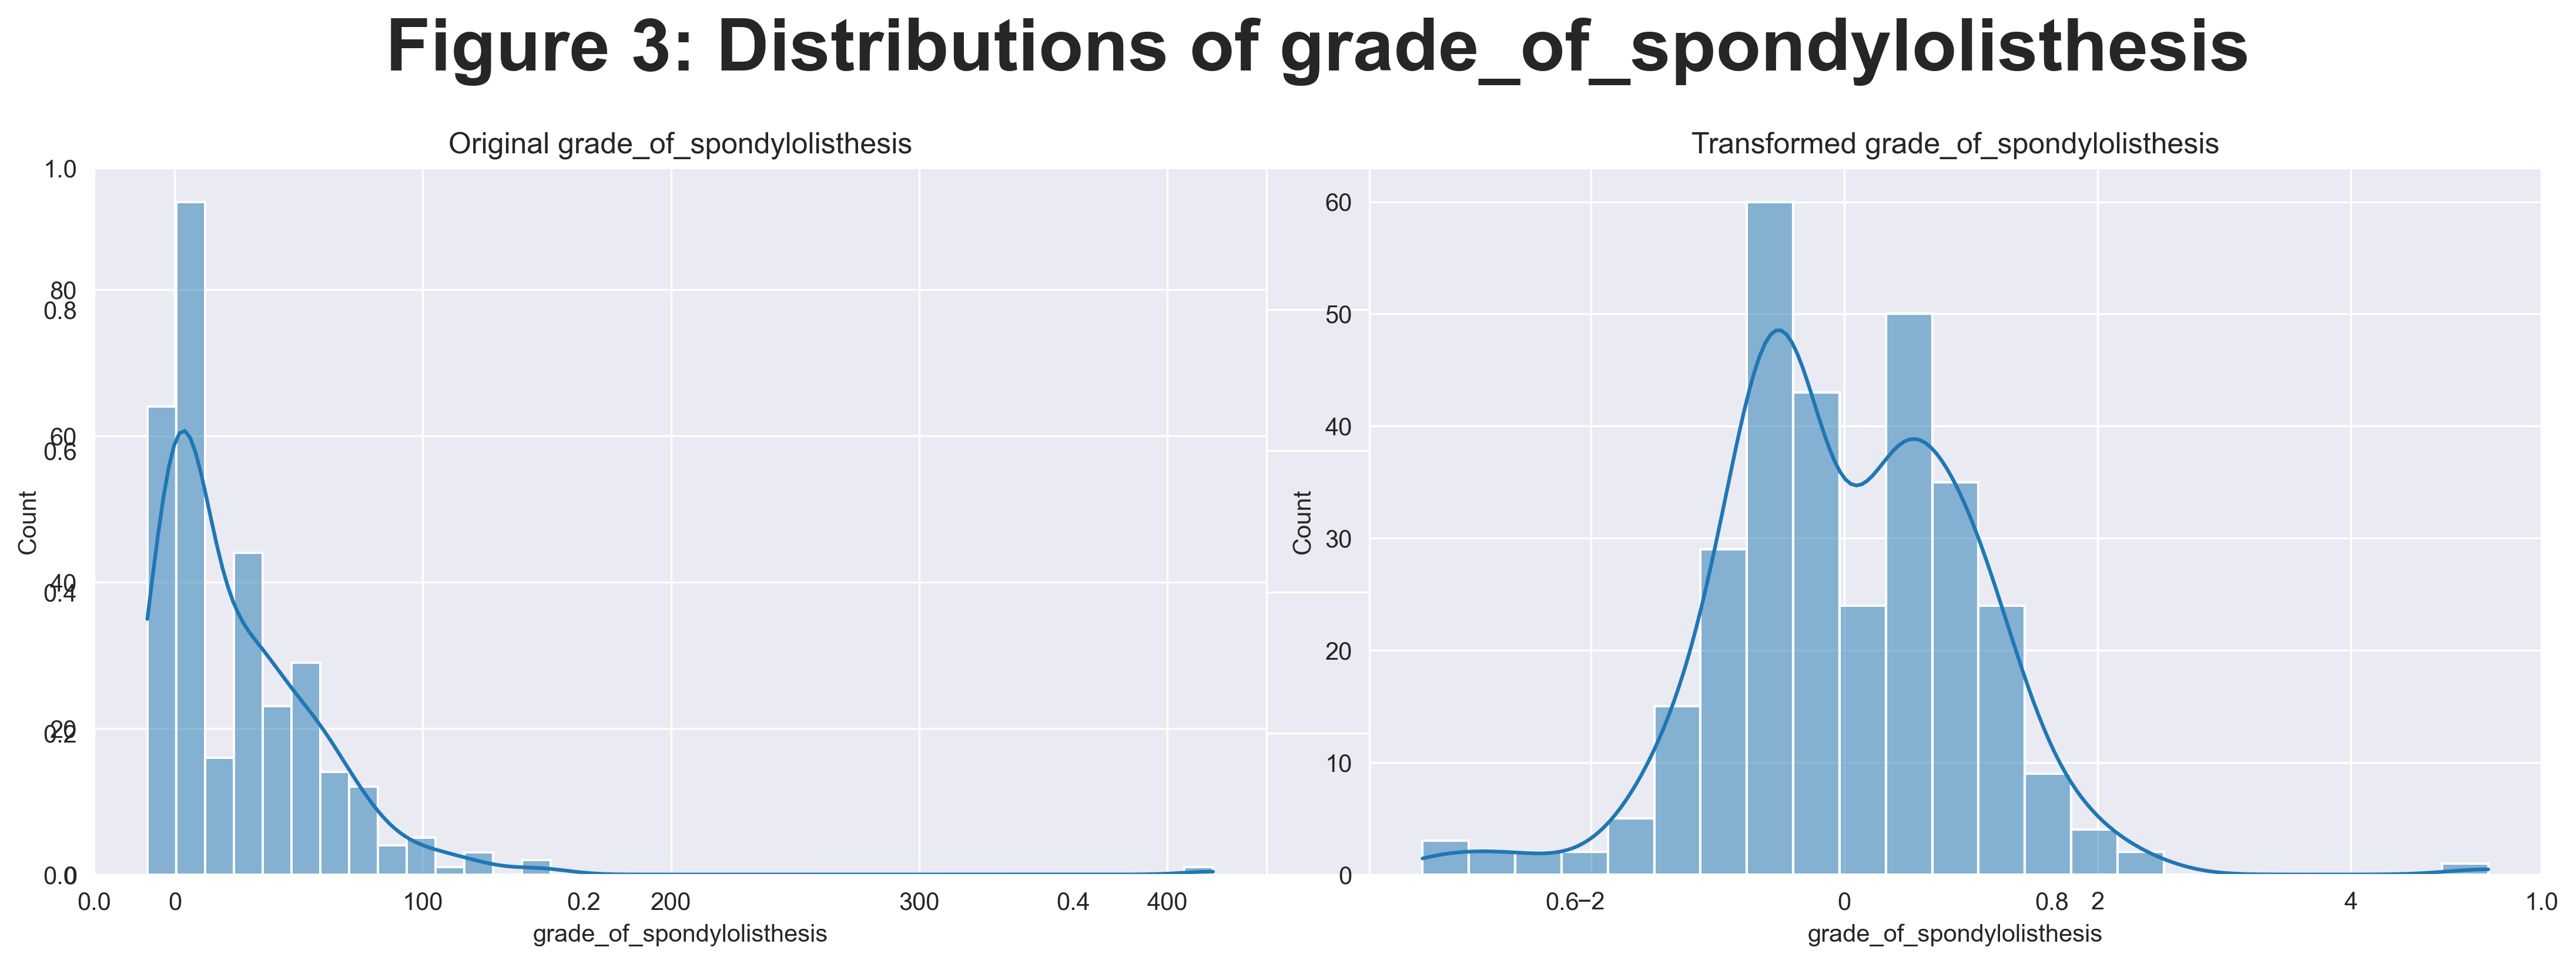

In [86]:
# doing e Yeo-Johnson transformation as it allows for negative values only for "grade_of_spondylolisthesis"
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')

# only the skewed feature is transformed
skewed_feature = scaler.fit_transform(DF2[['grade_of_spondylolisthesis']])

DF2_transformed = DF2.copy()
DF2_transformed['grade_of_spondylolisthesis'] = skewed_feature


# compare distributions before and after transformations
plt.figure(figsize=(15, 6), dpi=300, facecolor='w', edgecolor='k')
plt.title('Figure 3: Distributions of grade_of_spondylolisthesis', fontsize=30, fontweight='bold', pad=40)
plt.subplot(1, 2, 1)
sns.histplot(DF1['grade_of_spondylolisthesis'], kde=True)
plt.title('Original grade_of_spondylolisthesis')
plt.subplot(1, 2, 2)
sns.histplot(DF2_transformed['grade_of_spondylolisthesis'], kde=True)
plt.title('Transformed grade_of_spondylolisthesis')
plt.tight_layout()
plt.show()



here we choose to leave outliers as it's a medical dataset, so we don't want to change things too much. Therefore, we'll choose a model that's more robust to them.

# <center> **Standardisation** <center>

In [69]:
DF3 = DF2_transformed.copy()


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_to_scale = DF3.columns[:-1] 

DF3_scaled = scaler.fit_transform(DF3[features_to_scale])

DF3_scaled = pd.DataFrame(DF3_scaled, columns=features_to_scale)

DF3_scaled['class'] = DF3['class'].values 

DF3_scaled.describe()


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,310.000000,310.000000
mean,7.563842e-16,3.438110e-16,-1.375244e-16,9.168293e-17,1.203339e-15,0.000000,0.677419
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617,0.468220
min,-1.995927e+00,-2.411223e+00,-2.047673e+00,-2.207573e+00,-3.598080e+00,-3.332185,0.000000
25%,-8.172797e-01,-6.880918e-01,-8.060277e-01,-7.168355e-01,-5.423042e-01,-0.622315,0.000000
50%,-1.049776e-01,-1.183852e-01,-1.277118e-01,-4.095722e-02,2.590615e-02,-0.135153,1.000000
75%,7.196252e-01,4.580768e-01,5.975707e-01,7.267047e-01,5.676050e-01,0.668981,1.000000
max,4.029077e+00,3.191268e+00,3.984562e+00,5.855955e+00,3.395683e+00,5.085996,1.000000


# <center> **Addressing Class Imbalance** <center>

In [72]:
DF4 = DF3_scaled.copy()



In [73]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = DF4.drop('class', axis=1)
y = DF4['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)

# SMOTE is only fitted on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


DF4_SMOTE = pd.DataFrame(X_train_smote, columns=X.columns)
DF4_SMOTE['class'] = y_train_smote

#class distribution after SMOTE
print(DF4_SMOTE['class'].value_counts())


class
1    168
0    168
Name: count, dtype: int64


In [51]:
DF4_SMOTE.to_csv('/Users/thomasguerin/Desktop/FinalDataV3.csv', index=False)

In [52]:
DF4_SMOTE.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class
0,0.918948,2.440666,2.232223,-0.639790,1.079220,1.735652,1
1,1.171152,0.880415,0.484203,0.847404,0.163916,0.902164,1
2,0.673136,0.140823,-0.050244,0.759351,-0.279070,-0.667159,1
3,0.293086,0.662240,-0.332043,-0.117444,1.392845,0.022542,1
4,0.868391,1.400832,2.033560,0.070601,-0.834118,0.951331,1
